In [ ]:
# Import the libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Import utilities
import utilities
import importlib
importlib.reload(utilities)

<module 'utilities' from '/Users/jessegunter/Documents/ai_course/challenges/Project2_Bank_Customer_Churn/utilities.py'>

In [ ]:
# Import the data
df = pd.read_csv('Resources/Customer-Churn-Records.csv')

In [ ]:
# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, class_weight='balanced', random_state=42)

In [ ]:
# Run the model and score it
scores = utilities.processData(df, rf_model)

Accuracy Score: 0.845
Balanced accuracy Score: 0.7786006197440903
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      1607
           1       0.59      0.67      0.63       393

    accuracy                           0.84      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.85      0.84      0.85      2000

auc Score:  0.8678428187113947


In [ ]:
from sklearn.model_selection import GridSearchCV

#Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}
#Run the grid and score it
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='balanced_accuracy')

scores_gscv = utilities.processData(df, grid_search)

print("Best parameters found: ", grid_search.best_params_)

Accuracy Score: 0.846
Balanced accuracy Score: 0.7821062748693297
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      1607
           1       0.60      0.68      0.63       393

    accuracy                           0.85      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.85      0.85      0.85      2000

auc Score:  0.8628994332999237
Best parameters found:  {'class_weight': 'balanced_subsample', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


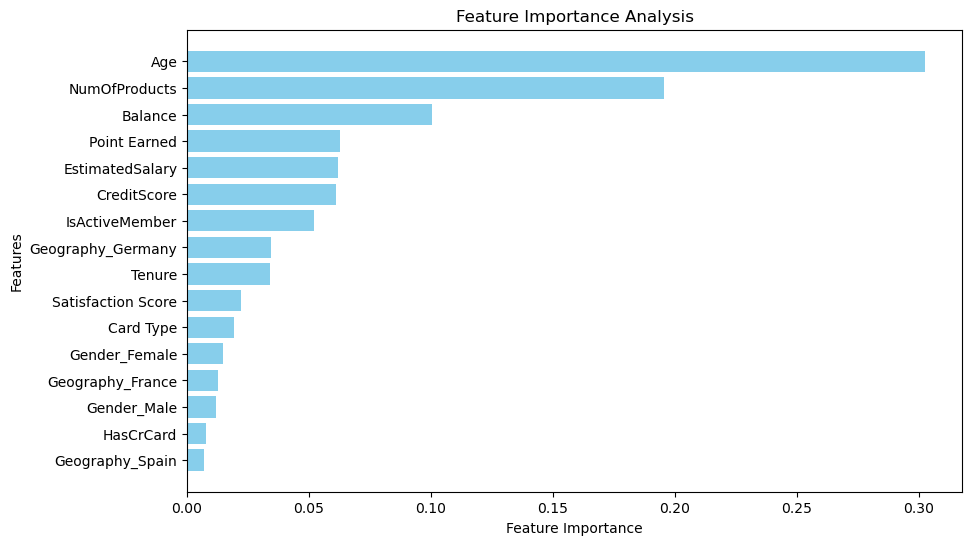

In [26]:
import matplotlib.pyplot as plt

# Feature importances from your model
features = [
    "Age", "NumOfProducts", "Balance", "Point Earned", "EstimatedSalary", 
    "CreditScore", "IsActiveMember", "Geography_Germany", "Tenure", 
    "Satisfaction Score", "Card Type", "Gender_Female", "Geography_France", 
    "Gender_Male", "HasCrCard", "Geography_Spain"
]
importances = [
    0.302480, 0.195464, 0.100326, 0.062834, 0.061965, 
    0.061034, 0.052127, 0.034470, 0.034009, 0.022105, 
    0.019251, 0.014764, 0.012671, 0.011748, 0.007839, 0.006912
]

# Sort features by importance
sorted_idx = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in sorted_idx]
sorted_importances = [importances[i] for i in sorted_idx]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.savefig('Resources/feature_importance_1.png')
plt.show()
